In [1]:
from __future__ import print_function

import matplotlib.pyplot as plot
import importlib
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torch.autograd import Variable

from PIL import Image

from option import Options
from utils import *
import sys
import os
import cv2
import time

In [2]:
PATH = "./output/"

In [3]:
# init the args
global best_pred, errlist_train, errlist_val
cuda = True
torch.manual_seed(1)

# init the model
models = importlib.import_module('model.'+ 'DEPnet')
model = models.Net(23)
model.cuda()
# Please use CUDA_VISIBLE_DEVICES to control the number of gpus
model = torch.nn.DataParallel(model)
model.load_state_dict(torch.load(PATH + 'test_model.pth'))
#print(model)
model.eval()

DataParallel(
  (module): Net(
    (pretrained): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchN

In [4]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

<class 'PIL.JpegImagePlugin.JpegImageFile'>
The input picture is classified as [wood], with probability 0.963.
Caculation time is  0.8031151294708252 seconds


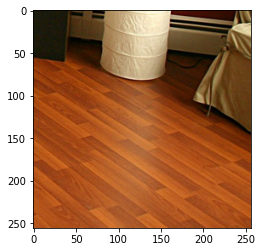

In [5]:
import time

start_time = time.time()
PATH_TO_IMAGE = "./testimg/wood.jpg"

img = Image.open(PATH_TO_IMAGE)
resize_img = img.resize((256, 256))
plot.imshow(resize_img)

x = transform(img)
x = x.unsqueeze(0)

classes = ['brick', 'carpet', 'ceramic', 'fabric', 'foliage', 'food', 'glass', 'hair', 
           'leather', 'metal', 'mirror', 'other', 'painted', 'paper', 'plastic', 'polishedstone', 
           'skin', 'sky', 'stone', 'tile', 'wallpaper', 'water', 'wood']

output = model(x)  # Forward pass
pred = torch.argmax(output, 1)  # Get predicted class if multi-class classification
print('The input picture is classified as [%s], with probability %.3f.'%
     (classes[pred.tolist()[0]], (torch.nn.functional.softmax(output, dim = 1)[0][pred.tolist()[0]]).tolist()))
print('Caculation time is ', time.time()-start_time, 'seconds')

In [6]:
print(type(resize_img))

<class 'PIL.Image.Image'>


In [7]:
print(type(x))

<class 'torch.Tensor'>
